# Import lib

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
from google.colab import drive

# Correct mount point without spaces
drive.mount('/content/Mon_drive', force_remount=True)

Mounted at /content/Mon_drive


In [146]:
class Config:
    # Chemins principaux (utilisez DriveConfig.BASE_PATH si vous êtes sur Google Drive)
    BASE_PATH = "/content/Mon_drive/MyDrive/Projet_ml"
    DATA_PATH = f"{BASE_PATH}/data"
    MODELS_PATH = f"{BASE_PATH}/models"
    OUTPUT_PATH = f"{BASE_PATH}/output"
    OUTPUT_IMAGE_PATH = f"{OUTPUT_PATH}/images"


    # Paramètres de validation d'image
    VALID_EXTENSIONS = {'.jpg', '.jpeg', '.png', '.pdf'}
    MIN_IMAGE_SIZE = (100, 100)
    MAX_FILE_SIZE = 10 * 1024 * 1024  # 10MB

# Reading the file

In [147]:
df = pd.read_csv(f"{Config.DATA_PATH}/dataset_resumes.csv")
df.head(5)

,Category,Resume
0,SAP Developer resumes,EXPERIENCE\n\nEDUCATION\n\nSKILLS\n\nWilburn M...
1,SAP Developer resumes,Robert Smith shone (123) 456 7890\neri fsouulk...
2,SAP Developer resumes,Robert Smith Phone (12) 436 7899\nevil fsounlk...
3,SAP Developer resumes,comacis\n\nSmee @\n\nworse\n\novcanon\n\n \n\n...
4,SAP Developer resumes,"KENDAL DECKOW\n\n52368 Harley Locks, Houston, ..."


In [148]:
df.shape

(2852, 2)

In [149]:
df.sample(6)

,Category,Resume
2562,Agricultural resumes,"Salman Khan\nNM State Rt. 4\n\nSaddar, Rawalpi..."
797,Mechanical Engineer resumes,EXPERIENCE\n\nEDUCATION\n\nSKILLS\n\nConner Ca...
2525,Arts resumes,"ELISA WALTERS\n\n634 E Texas Street, Vancouver..."
2322,Civil Engineer resumes,AREAS OF EXPERTISE\nPlanning regulations\nHeal...
1812,data science resumes,"EMILY SAAVEDRA\n\n \n\n88 Hendford Hill, Londo..."
1090,Network Security Engineer resumes,EXPERIENCE\n\nEDUCATION\n\nSKILLS\n\nZechariah...


In [150]:
df['Category'].unique()

array(['SAP Developer resumes', 'Testing resumes', 'Sales resumes',
       'SQL Developer resumes', 'web designing resumes',
       'React Developer resumes', 'Managment resumes',
       'Operations Manager resumes', 'Public Relations resumes',
       'HR resumes', 'Java Developer resumes',
       'Mechanical Engineer resumes', 'PMO resumes',
       'Python Developer resumes', 'Information Technology resumes',
       'Network Security Engineer resumes', 'Health_Fitness resumes',
       'Digital Media resumes', 'Designing resumes',
       'Electrical Engineering resumes', 'ETL Developer resumes',
       'Education resumes', 'DotNet Developer resumes',
       'DevOps Engineer resumes', 'Finance resumes',
       'Food_Beverages resumes', 'data science resumes',
       'Consultant resumes', 'Blockchain resumes', 'Database resumes',
       'Banking resumes', 'Building _Construction resumes', 'BPO resumes',
       'Business Analyst resumes', 'Aviation resumes',
       'Civil Engineer resumes

In [151]:
df["Category"].value_counts()

,count
Category,
data science resumes,120
Mechanical Engineer resumes,105
Sales resumes,95
Advocate resumes,94
Civil Engineer resumes,89
HR resumes,88
DevOps Engineer resumes,87
Arts resumes,87
SQL Developer resumes,82


# Data Visualisation

In [152]:
duplicate_count = df.duplicated().sum()
print(f"Nombre de doublons : {duplicate_count}")

Nombre de doublons : 315


In [153]:
nan_count = df.isna().any(axis=1).sum()
print(f"Nombre de lignes avec des valeurs manquantes : {nan_count}")

Nombre de lignes avec des valeurs manquantes : 112


In [154]:
df = df.drop_duplicates().dropna()

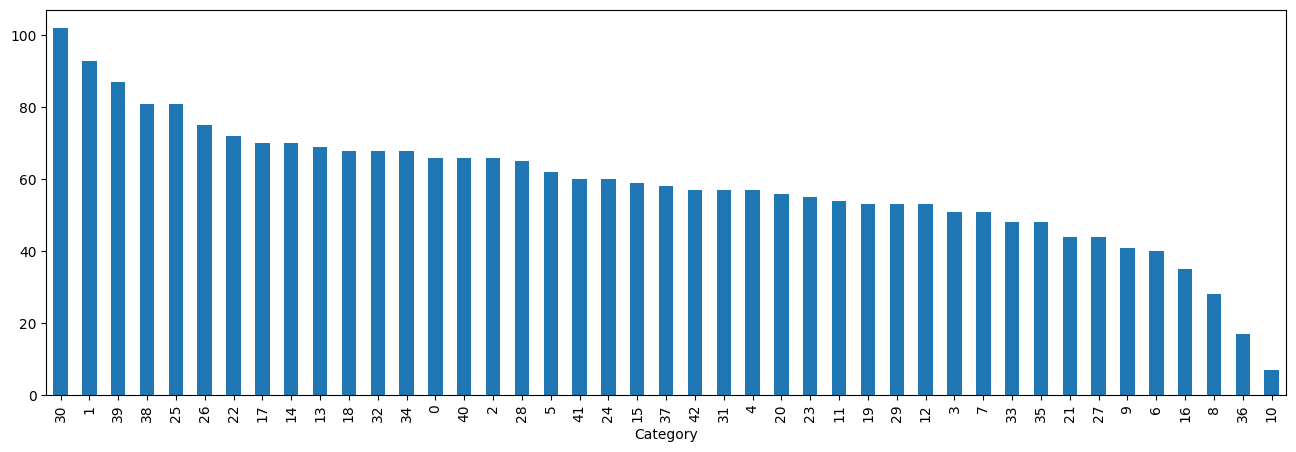

In [178]:
plt.figure(figsize=(16,5))
df['Category'].value_counts().plot(kind='bar')
plt.savefig(f'{Config.OUTPUT_IMAGE_PATH}/Category_value_count.png')
plt.show()

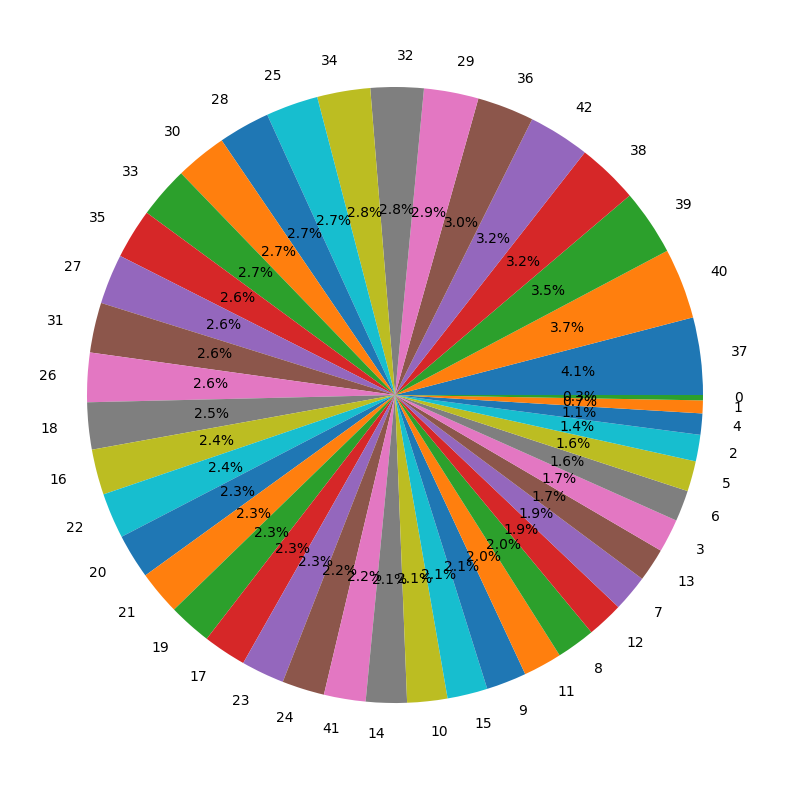

In [179]:
cout = df['Category'].value_counts()
label = df['Category'].unique()
plt.figure(figsize=(20,10))
plt.pie(cout,labels=label,autopct='%1.1f%%')
plt.savefig(f'{Config.OUTPUT_IMAGE_PATH}/pie.png')
plt.show()

# Cleaning text

In [157]:
def clean_text(text):

    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')

    text = re.sub(url_pattern, '', text)
    text = re.sub(email_pattern, '', text)
    text = re.sub('[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    text = text.lower()

    return text



In [158]:
## Testing

In [159]:
stR = 'he HHHH quick brown Fox jumps over, the, lazy Dog. https://colab.research.google.com https://colab.research.google.com/drive/1InulV4aFkCSzOP9iPZekpxKcnQ8QGcnN#scrollTo=W05YFsnEn_9k ayoubgorry@gmail.com'

clean_text(stR)

'hhhh quick brown fox jumps lazy dog'

In [160]:
df['Resume'] = df['Resume'].apply(lambda x: clean_text(x))
df['Resume'][12]

'sample sap specialist resume mark escobar 837 roane avenue herndon md 22070 2222224287 job objective acquire position sap specialist allows use abilities enhance grow company highlights qualifications handson experience as400 iseries isos familiarity sap pp mm sd functionality customized solutions proficient sap apo crm scm bw excellent communications interpersonal skills ability operate within complex technical environments ability work independently require minimal supervision professional experience sap specialist osram sylvania inc herndon md may 2006 present designed applied supported supply chain process sap environment collaborated business resources analyze technical solution met business requirements analyzed collected business requirements developed technical solutions applied solutions utilized project management methods tools provide tracking information sap specialist bestica inc herndon md march 2003 april 2006 supported modified sd mm configuration collected business re

# Encodding df['Category']

In [161]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Category'].unique()

array([37, 40, 39, 38, 42, 36, 29, 32, 34, 25, 28, 30, 33, 35, 27, 31, 26,
       18, 16, 22, 20, 21, 19, 17, 23, 24, 41, 14, 10, 15,  9, 11,  8, 12,
        7, 13,  3,  6,  5,  2,  4,  1,  0])

In [162]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [163]:
X_train , X_test, y_train , y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [164]:
X_train.shape

(2012, 61006)

In [165]:
X_test.shape

(503, 61006)

In [166]:
y_train.shape

(2012,)

In [167]:
y_test.shape

(503,)

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [169]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
}

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 0.8449304174950298
Accuarcy of LogisticRegression on test data: 0.878727634194831
Accuarcy of RandomForestClassifier on test data: 0.8648111332007953
Accuarcy of SVC on test data: 0.8429423459244533
Accuarcy of MultinomialNB on test data: 0.6341948310139165


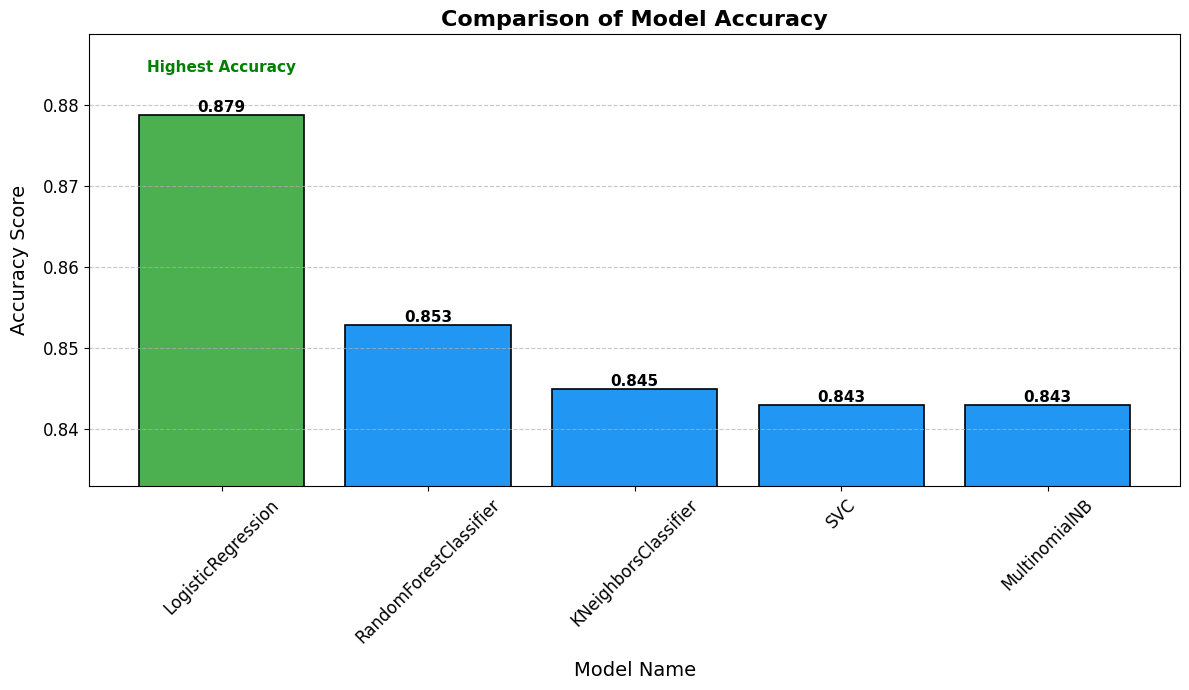

In [180]:
import matplotlib.pyplot as plt

# Accuracy scores (from your results)
accuracy_scores = {
    "KNeighborsClassifier": 0.8449304174950298,
    "LogisticRegression":  0.878727634194831,
    "RandomForestClassifier": 0.852882703777336,
    "SVC": 0.8429423459244533,
    "MultinomialNB": 0.8429423459244533,
}

# Sort the scores in descending order
accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

# Extract model names and their corresponding scores
model_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Define plot colors
colors = ['#4CAF50' if i == max(scores) else '#2196F3' for i in scores]

# Plotting
plt.figure(figsize=(12, 7))
bars = plt.bar(model_names, scores, color=colors, edgecolor='black', linewidth=1.2)

# Add numerical accuracy scores above each bar
for bar, score in zip(bars, scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height(),  # Y-coordinate (top of the bar)
        f"{score:.3f}",  # Format the score with 3 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=11,
        color='black',
        fontweight='bold'
    )

# Customizing the plot
plt.xlabel('Model Name', fontsize=14, labelpad=10)
plt.ylabel('Accuracy Score', fontsize=14, labelpad=10)
plt.title('Comparison of Model Accuracy', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust ylim dynamically based on scores
min_score = min(scores) - 0.01
max_score = max(scores) + 0.01
plt.ylim(min_score, max_score)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the highest performing model
plt.text(
    model_names[scores.index(max(scores))], max(scores) + 0.005,
    'Highest Accuracy', ha='center', va='bottom',
    fontsize=11, color='green', fontweight='bold'
)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig(f'{Config.OUTPUT_IMAGE_PATH}/comparison_of_model_accuracy.png')
# Display the plot
plt.show()


In [173]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [174]:
text_test = """Your Name
Cloud Engineer
City, Country  •  (123) 456-789  •  yourname@resumeworded.com  •  linkedin.com/in/your-profile
EXPERIENCE
Google Cloud Platform
January 2021 - Present
Cloud Engineer
Architected and deployed scalable cloud infrastructures supporting 100k+ users, achieving a 99.99% uptime and enhancing system resilience.
Orchestrated a multi-region deployment strategy using Terraform, resulting in a 50% reduction in deployment time and costs.
Pioneered the integration of AI-powered analytics tools, boosting data processing speed by 40% and aiding in predictive maintenance.
Led a cross-functional team in the migration of legacy systems to the cloud, resulting in a 30% savings on operational expenses and improved scalability.
Instituted comprehensive cybersecurity measures using industry standards, diminishing security incidents by 70% within a year.
Resume Worded
May 2018 - December 2020
DevOps Engineer
Harmonized cross-platform CI/CD pipelines which accelerated product delivery cycles by 25% and improved deployment reliability.
Implemented containerization with Docker and orchestration with Kubernetes, facilitating 15% higher app performance and efficiency.
Developed custom monitoring solutions with ELK Stack, improving system observability and reducing downtime by 10%.
Salesforce
March 2015 - April 2018
Systems Administrator
Overhauled and optimized network infrastructure, enhancing overall system performance by 20% and user satisfaction.
Automated routine maintenance tasks using PowerShell scripts, saving 15 hours of manual work per week.
Coached.com
June 2012 - February 2015
IT Support Specialist
Upgraded 200+ end-user systems to hybrid cloud infrastructure, increasing operational efficiency by 30%.
Resolved an average of 30 technical tickets per week, sustaining a 95% customer satisfaction rate.
EDUCATION
Resume Worded Institute
May 2021
Master of Science - Cloud Computing
Thesis on 'Scalable Architectures in Multi-Cloud Environments', Part-time
Resume Worded University
June 2014
Bachelor of Science - Information Technology
Concentration in Network Security
Awards: Summa Cum Laude, President's Scholarship Recipient
SKILLS
Cloud Platforms: Google Cloud Platform, AWS, Azure, Kubernetes, Docker, OpenStack
Programming & Scripting: Python (Expert), Bash (Expert), Go (Intermediate), Jenkins DSL, Terraform, Ansible
CI/CD & Version Control: Jenkins, CircleCI, Travis CI, Git (Expert), SVN, Mercurial
Monitoring & Logging: Prometheus, Grafana (Intermediate), ELK Stack, Splunk, Datadog
OTHER
Certifications: Certified Kubernetes Administrator (2022), AWS Certified Solutions Architect - Associate (2019)
Professional Development: Google Cloud Professional Cloud Architect Course (2020), DevOps Foundation Certificate (2018)
Publications: Co-author of 'DevOps and Containerization Handbook', Contributor to the Resume Worded Tech Blog
Conferences: Speaker at CloudExpo 2022, Attended DockerCon 2021, Panelist at DevOpsDays 2019
"""

In [175]:
# Map encoded categories to their string values
from sklearn.preprocessing import LabelEncoder

# Assuming `df['Category']` is already label-encoded
category_map = {index: label.replace(" resumes", "") for index, label in enumerate(le.classes_)}

print(category_map)


{0: 'Accountant', 1: 'Advocate', 2: 'Agricultural', 3: 'Apparel', 4: 'Architects', 5: 'Arts', 6: 'Automobile', 7: 'Aviation', 8: 'BPO', 9: 'Banking', 10: 'Blockchain', 11: 'Building _Construction', 12: 'Business Analyst', 13: 'Civil Engineer', 14: 'Consultant', 15: 'Database', 16: 'Designing', 17: 'DevOps Engineer', 18: 'Digital Media', 19: 'DotNet Developer', 20: 'ETL Developer', 21: 'Education', 22: 'Electrical Engineering', 23: 'Finance', 24: 'Food_Beverages', 25: 'HR', 26: 'Health_Fitness', 27: 'Information Technology', 28: 'Java Developer', 29: 'Managment', 30: 'Mechanical Engineer', 31: 'Network Security Engineer', 32: 'Operations Manager', 33: 'PMO', 34: 'Public Relations', 35: 'Python Developer', 36: 'React Developer', 37: 'SAP Developer', 38: 'SQL Developer', 39: 'Sales', 40: 'Testing', 41: 'data science', 42: 'web designing'}


In [176]:
cleaned_resume = clean_text(text_test)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {0: 'Accountant', 1: 'Advocate', 2: 'Agricultural', 3: 'Apparel', 4: 'Architects', 5: 'Arts', 6: 'Automobile', 7: 'Aviation', 8: 'BPO', 9: 'Banking', 10: 'Blockchain', 11: 'Building _Construction', 12: 'Business Analyst', 13: 'Civil Engineer', 14: 'Consultant', 15: 'Database', 16: 'Designing', 17: 'DevOps Engineer', 18: 'Digital Media', 19: 'DotNet Developer', 20: 'ETL Developer', 21: 'Education', 22: 'Electrical Engineering', 23: 'Finance', 24: 'Food_Beverages', 25: 'HR', 26: 'Health_Fitness', 27: 'Information Technology', 28: 'Java Developer', 29: 'Managment', 30: 'Mechanical Engineer', 31: 'Network Security Engineer', 32: 'Operations Manager', 33: 'PMO', 34: 'Public Relations', 35: 'Python Developer', 36: 'React Developer', 37: 'SAP Developer', 38: 'SQL Developer', 39: 'Sales', 40: 'Testing', 41: 'data science', 42: 'web designing'}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  DevOps Engineer


In [177]:
import pickle
pickle.dump(tfidf, open(f'{Config.MODELS_PATH}/tfidf.pkl', 'wb'))
pickle.dump(model, open(f'{Config.MODELS_PATH}/model.pkl', 'wb'))